## BÀI TOÁN: Dự đoán tiêu thụ năng lượng
- xây dựng mô hình dự đoán tiêu thụ năng lượng cho các khu vực (Zone 1, Zone 2, Zone 3) dựa trên các yếu tố thời tiết và môi trường (nhiệt độ, độ ẩm, tốc độ gió, và bức xạ mặt trời). Các mô hình học máy như hồi quy tuyến tính, hồi quy cây quyết định, hoặc các mô hình phức tạp hơn như Random Forest hoặc XGBoost có thể được sử dụng để dự đoán tiêu thụ năng lượng theo thời gian.

In [71]:
import pandas as pd

In [72]:
file_path = 'data/TetuanCitypowerconsumption.csv'
data = pd.read_csv(file_path)


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [73]:
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [74]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


## MÔ TẢ DỮ LIỆU
1. DateTime:

- Mô tả: Cột này chứa thông tin về thời gian ghi nhận các giá trị dữ liệu. Định dạng là "ngày/tháng/năm giờ:phút".

- Loại dữ liệu: datetime (cần chuyển đổi sang dạng datetime nếu cần cho phân tích chuỗi thời gian).

2. Temperature:

- Mô tả: Nhiệt độ đo được tại thời điểm tương ứng (đơn vị: °C).
- Loại dữ liệu: float

3. Humidity:

- Mô tả: Độ ẩm không khí tại thời điểm đo (đơn vị: %).
- Loại dữ liệu: float

4. Wind Speed:

- Mô tả: Tốc độ gió tại thời điểm đo (đơn vị: m/s).

- Loại dữ liệu: float

5. General Diffuse Flows:

- Mô tả: Dòng bức xạ tán xạ chung (có thể là bức xạ mặt trời, đơn vị: kW/m²).

- Loại dữ liệu: float

6. Diffuse Flows:

- Mô tả: Dòng bức xạ tán xạ (đơn vị có thể là kW/m²).

- Loại dữ liệu: float

7. Zone 1 Power Consumption:

- Mô tả: Mức tiêu thụ năng lượng tại khu vực 1 (đơn vị: kWh).

- Loại dữ liệu: float

8. Zone 2 Power Consumption:

- Mô tả: Mức tiêu thụ năng lượng tại khu vực 2 (đơn vị: kWh).

- Loại dữ liệu: float

9. Zone 3 Power Consumption:

- Mô tả: Mức tiêu thụ năng lượng tại khu vực 3 (đơn vị: kWh).

- Loại dữ liệu: float

## TIỀN SỬ LÝ DỮ LIỆU

In [77]:
# kiểm tra dữ liệu trùng lặp
data.duplicated().sum()

0

In [78]:
# Đổi tên nhiều cột
data.rename(columns={
    'Temperature': 'nhiet_do',
    'Humidity': 'do_am',
    'Wind Speed': 'toc_do_gio',
    'general diffuse flows': 'dong_buc_xa_chung',
    'diffuse flows': 'dong_buc_xa_tx',
    'Zone 1 Power Consumption': 'khu1',
    'Zone 2  Power Consumption': 'khu2',
    'Zone 3  Power Consumption': 'khu3'
}, inplace=True)

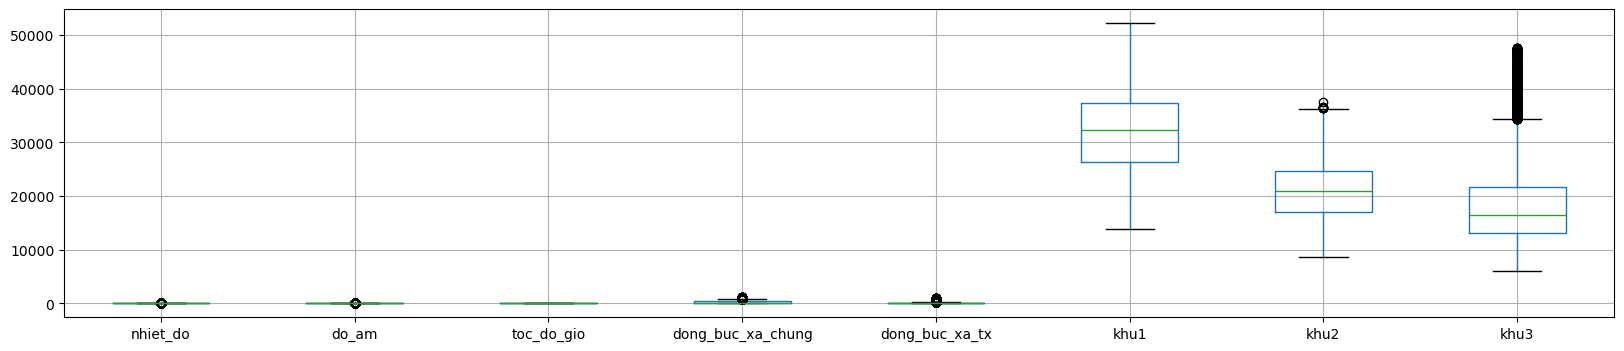

In [79]:
import matplotlib.pyplot as plt
# kiểm tra và sử lý dữ liệu ngoại lai 
plt.figure(figsize=(20,4))
data.boxplot()
plt.ylabel('')
plt.show()

In [80]:
# Hàm để xác định và hiển thị ngoại lai
def show_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Hiển thị các giá trị ngoại lai
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'Ngoại lai ở cột {column}:')
    return outliers[[column]]

# Hiển thị ngoại lai cho các cột charges
outliers_Temperature = show_outliers(data, 'nhiet_do')
outliers_Humidity = show_outliers(data, 'do_am')
outliers_general_diffuse_flows = show_outliers(data, 'dong_buc_xa_chung')
outliers_diffuse_flows = show_outliers(data, 'dong_buc_xa_tx')
outliers_Zone2_Power_Consumption = show_outliers(data, 'khu2')
outliers_Zone3_Power_Consumption = show_outliers(data, 'khu3')

# In các giá trị ngoại lai
print(outliers_Temperature)
print(outliers_Humidity)
print(outliers_diffuse_flows)
print(outliers_general_diffuse_flows)
print(outliers_Zone2_Power_Consumption)
print(outliers_Zone3_Power_Consumption)


Ngoại lai ở cột nhiet_do:
Ngoại lai ở cột do_am:
Ngoại lai ở cột dong_buc_xa_chung:
Ngoại lai ở cột dong_buc_xa_tx:
Ngoại lai ở cột khu2:
Ngoại lai ở cột khu3:
       nhiet_do
27000     35.78
27001     36.21
27002     36.37
27003     36.69
27004     36.59
...         ...
31910     35.81
32056     35.94
32057     35.89
32058     35.66
32059     35.64

[142 rows x 1 columns]
       do_am
17968  23.52
17969  23.66
19088  21.96
19089  20.92
19090  20.62
...      ...
38116  14.80
38117  19.21
38118  20.21
38119  21.64
38120  22.61

[291 rows x 1 columns]
       dong_buc_xa_tx
242             253.4
385             256.6
386             257.7
528             254.4
529             281.1
...               ...
50044           283.7
50202           288.4
50932           252.8
51783           253.5
51921           265.4

[4571 rows x 1 columns]
       dong_buc_xa_chung
6411               803.0
7422               810.0
7423               877.0
7424               845.0
7425               818.0
...  

In [81]:
def replace_outliers_with_bounds(data, column):
    # Tính toán các giá trị Q1 và Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # Tính khoảng tứ phân vị (IQR)
    IQR = Q3 - Q1
    # Tính các giới hạn dưới và trên
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Thay thế các giá trị ngoại lệ nhỏ hơn lower_bound bằng lower_bound
    data.loc[data[column] < lower_bound, column] = lower_bound
    # Thay thế các giá trị ngoại lệ lớn hơn upper_bound bằng upper_bound
    data.loc[data[column] > upper_bound, column] = upper_bound
    
    return data



In [82]:
data

,DateTime,nhiet_do,do_am,toc_do_gio,dong_buc_xa_chung,dong_buc_xa_tx,khu1,khu2,khu3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [83]:
columns_to_replace = ['nhiet_do','do_am','dong_buc_xa_chung','dong_buc_xa_tx','khu2','khu3']

for column in columns_to_replace:
    data_out = replace_outliers_with_bounds(data, column)

# Kiểm tra lại ngoại lai

print(show_outliers(data_out, 'nhiet_do'))
print(show_outliers(data_out, 'do_am'))
print(show_outliers(data_out, 'dong_buc_xa_chung'))
print(show_outliers(data_out, 'dong_buc_xa_tx'))
print(show_outliers(data_out, 'khu2'))
print(show_outliers(data_out, 'khu3'))


Ngoại lai ở cột nhiet_do:
Empty DataFrame
Columns: [nhiet_do]
Index: []
Ngoại lai ở cột do_am:
Empty DataFrame
Columns: [do_am]
Index: []
Ngoại lai ở cột dong_buc_xa_chung:
Empty DataFrame
Columns: [dong_buc_xa_chung]
Index: []
Ngoại lai ở cột dong_buc_xa_tx:
Empty DataFrame
Columns: [dong_buc_xa_tx]
Index: []
Ngoại lai ở cột khu2:
Empty DataFrame
Columns: [khu2]
Index: []
Ngoại lai ở cột khu3:
Empty DataFrame
Columns: [khu3]
Index: []


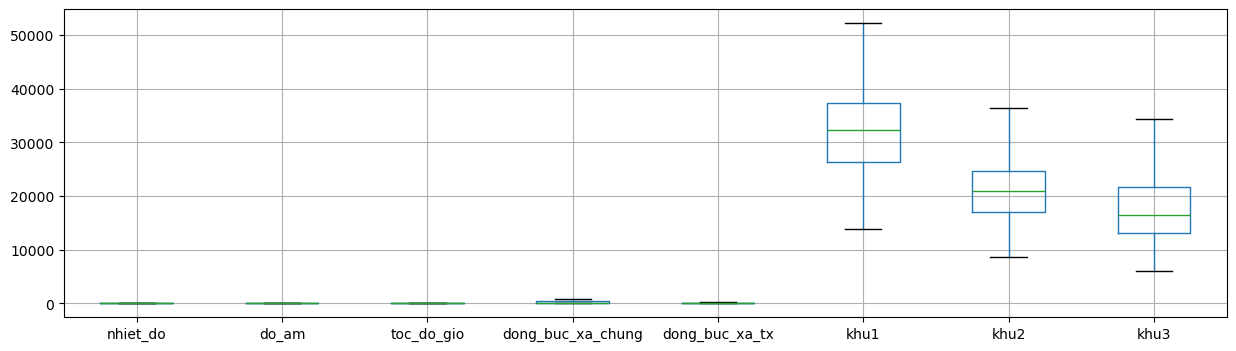

In [84]:
plt.figure(figsize=(15,4))
data_out.boxplot()
plt.ylabel('')
plt.show()

In [85]:
data_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DateTime           52416 non-null  object 
 1   nhiet_do           52416 non-null  float64
 2   do_am              52416 non-null  float64
 3   toc_do_gio         52416 non-null  float64
 4   dong_buc_xa_chung  52416 non-null  float64
 5   dong_buc_xa_tx     52416 non-null  float64
 6   khu1               52416 non-null  float64
 7   khu2               52416 non-null  float64
 8   khu3               52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [86]:
# Lưu dữ liệu vào file CSV
data_out.to_csv('processed_data.csv', index=False)


In [87]:
# Chuyển cột 'DateTime' thành kiểu datetime
data_out['DateTime'] = pd.to_datetime(data_out['DateTime'])

# Kiểm tra lại
print(data_out.dtypes)

DateTime             datetime64[ns]
nhiet_do                    float64
do_am                       float64
toc_do_gio                  float64
dong_buc_xa_chung           float64
dong_buc_xa_tx              float64
khu1                        float64
khu2                        float64
khu3                        float64
dtype: object


In [88]:
# Trích xuất năm, tháng, ngày và giờ từ cột 'DateTime'
data_out['Year'] = data_out['DateTime'].dt.year
data_out['Month'] = data_out['DateTime'].dt.month
data_out['Day'] = data_out['DateTime'].dt.day
data_out['Hour'] = data_out['DateTime'].dt.hour

# Kiểm tra dữ liệu
print(data_out[['DateTime', 'Year', 'Month', 'Day', 'Hour']].head())

             DateTime  Year  Month  Day  Hour
0 2017-01-01 00:00:00  2017      1    1     0
1 2017-01-01 00:10:00  2017      1    1     0
2 2017-01-01 00:20:00  2017      1    1     0
3 2017-01-01 00:30:00  2017      1    1     0
4 2017-01-01 00:40:00  2017      1    1     0


In [89]:
last_year = data_out['Month'].max()  # Lấy giá trị năm cuối cùng trong dữ liệu

# Lọc dữ liệu chỉ của năm cuối cùng
data_test = data_out[data_out['Month'] == last_year]
data_train = data_out[data_out['Month'] != last_year]

In [90]:
len(data_test)

4320

In [91]:
len(data_train)

48096

In [92]:
data_test.head()

,DateTime,nhiet_do,do_am,toc_do_gio,dong_buc_xa_chung,dong_buc_xa_tx,khu1,khu2,khu3,Year,Month,Day,Hour
48096,2017-12-01 00:00:00,19.07,55.77,0.086,0.048,0.100,27680.60837,22560.29457,11887.63505,2017,12,1,0
48097,2017-12-01 00:10:00,18.99,56.70,0.080,0.066,0.093,27011.40684,22133.16968,11680.19208,2017,12,1,0
48098,2017-12-01 00:20:00,18.88,58.11,0.078,0.070,0.104,26445.62738,21488.80025,11461.22449,2017,12,1,0
48099,2017-12-01 00:30:00,18.78,58.98,0.080,0.040,0.100,25885.93156,20715.55692,11236.49460,2017,12,1,0
48100,2017-12-01 00:40:00,18.77,59.98,0.078,0.044,0.093,25277.56654,20229.51826,11040.57623,2017,12,1,0


In [93]:
data_test.tail()

,DateTime,nhiet_do,do_am,toc_do_gio,dong_buc_xa_chung,dong_buc_xa_tx,khu1,khu2,khu3,Year,Month,Day,Hour
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,2017,12,30,23
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,2017,12,30,23
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,2017,12,30,23
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,2017,12,30,23
52415,2017-12-30 23:50:00,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820,2017,12,30,23


In [94]:
from sklearn.preprocessing import MinMaxScaler
dt_numeric = data_train.drop(columns=['DateTime', 'Year', 'Month', 'Day', 'Hour'])
scaler = MinMaxScaler()
scaler.fit(dt_numeric)


MinMaxScaler()

In [95]:
df_scaled = pd.DataFrame(scaler.fit_transform(dt_numeric), columns=dt_numeric.columns)

In [96]:
X = df_scaled[['nhiet_do',	'do_am', 'toc_do_gio',	'dong_buc_xa_chung', 'dong_buc_xa_tx']]  # Các biến đầu vào
y = df_scaled[['khu1']]

In [97]:
len(df_scaled)

48096

In [98]:
dt_numeric1 = data_test.drop(columns=['DateTime', 'Year', 'Month', 'Day', 'Hour'])

In [99]:
df_scaleds = pd.DataFrame(scaler.fit_transform(dt_numeric1), columns=dt_numeric1.columns)

In [100]:
Xx = df_scaleds[['nhiet_do',	'do_am', 'toc_do_gio',	'dong_buc_xa_chung', 'dong_buc_xa_tx']]  # Các biến đầu vào
yy = df_scaleds[['khu1']]

In [101]:
len(df_scaleds)

4320

In [102]:
len(yy)

4320

In [103]:
X.shape

(48096, 5)

## MÔ HÌNH DNN

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping

# Xây dựng mô hình DNN
model_dnn = Sequential()

# Thêm lớp đầu vào (input layer) và lớp ẩn đầu tiên
model_dnn.add(Dense(128, input_dim=X.shape[1], activation='relu', kernel_regularizer=l2(0.0001)))

# Thêm các lớp ẩn
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dropout(0.5))
# Thêm lớp đầu ra (output layer)
model_dnn.add(Dense(1))  # Chỉ có một giá trị đầu ra là mức tiêu thụ điện

# Biên dịch mô hình
model_dnn.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])

# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model_dnn.fit(X, y, epochs=50, batch_size=32)



Epoch 1/50


D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 984us/step - loss: 0.0547 - mae: 0.1806
Epoch 2/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - loss: 0.0301 - mae: 0.1369
Epoch 3/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - loss: 0.0280 - mae: 0.1324
Epoch 4/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - loss: 0.0274 - mae: 0.1308
Epoch 5/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - loss: 0.0270 - mae: 0.1308
Epoch 6/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - loss: 0.0268 - mae: 0.1294
Epoch 7/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - loss: 0.0267 - mae: 0.1295
Epoch 8/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - loss: 0.0265 - mae: 0.1286
Epoch 9/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - loss: 0.0261 - mae: 0.1273
Epoch 10/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - loss: 0.0262 - mae: 0.1279
Epoch 11/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - loss: 0.0262 - mae: 0.1277
Epoch 12/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - loss: 0.0262 - 

In [106]:
model_dnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,413 (130.52 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,276 (87.02 KB)

In [107]:
# Dự đoán mức tiêu thụ điện năng (Consumption) cho các dữ liệu đầu vào mới (X_test)
y_pred = model_dnn.predict(Xx)

# In ra kết quả dự đoán
len(y_pred)  # Hiển thị 10 giá trị dự đoán đầu tiên


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


4320

In [108]:
# Kiểm tra kết quả trên tập kiểm tra
loss, mae = model_dnn.evaluate(X, y)
print(f"Loss: {loss}, MAE: {mae}")


1503/1503 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - loss: 0.0252 - mae: 0.1208
Loss: 0.02361884154379368, MAE: 0.11799056082963943


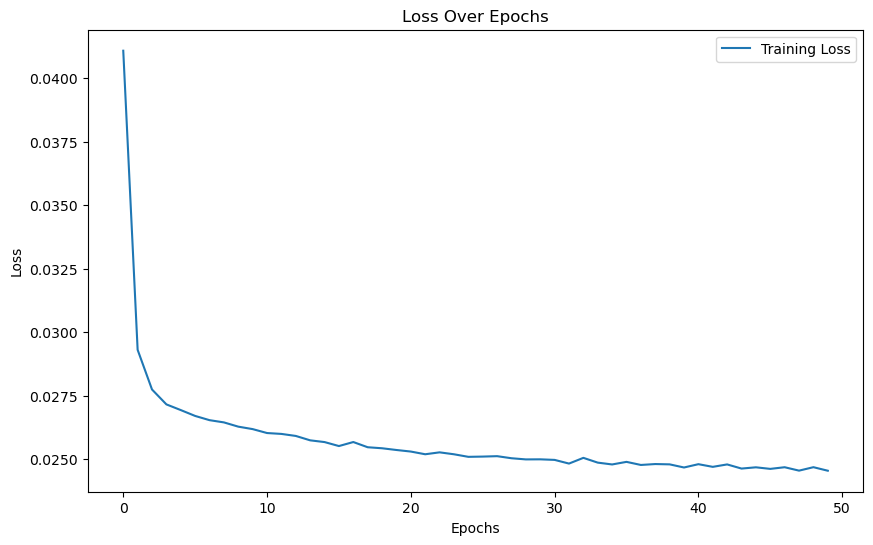

In [109]:
# Vẽ biểu đồ loss qua các epoch
loss_per_epoch = history.history['loss']
val_loss_per_epoch = history.history.get('val_loss', [])

plt.figure(figsize=(10,6))
plt.plot(range(len(loss_per_epoch)), loss_per_epoch, label='Training Loss')
if val_loss_per_epoch:
    plt.plot(range(len(val_loss_per_epoch)), val_loss_per_epoch, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [110]:
# Dự đoán mức tiêu thụ điện năng trên tập kiểm tra
y_pred = model_dnn.predict(Xx)

# Chuyển đổi dự đoán và giá trị thực tế thành DataFrame để dễ so sánh

results = pd.DataFrame({'khu1': yy.values.flatten(), 'Predicted': y_pred.flatten()})
# Sắp xếp kết quả dự đoán theo giá trị thực tế (True)
results_sorted = results.sort_index()
results_sorted['datetime'] = data_test['DateTime'].values
results_sorted = results_sorted.set_index('datetime')
# Hiển thị kết quả đã sắp xếp
print(results_sorted)


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
                         khu1  Predicted
datetime                                
2017-12-01 00:00:00  0.381667   0.917462
2017-12-01 00:10:00  0.356269   0.938933
2017-12-01 00:20:00  0.334796   0.966483
2017-12-01 00:30:00  0.313553   0.979207
2017-12-01 00:40:00  0.290464   1.001709
...                       ...        ...
2017-12-30 23:10:00  0.513738   0.294481
2017-12-30 23:20:00  0.486031   0.292865
2017-12-30 23:30:00  0.454168   0.291589
2017-12-30 23:40:00  0.430155   0.288269
2017-12-30 23:50:00  0.407065   0.285791

[4320 rows x 2 columns]


<Axes: xlabel='datetime'>

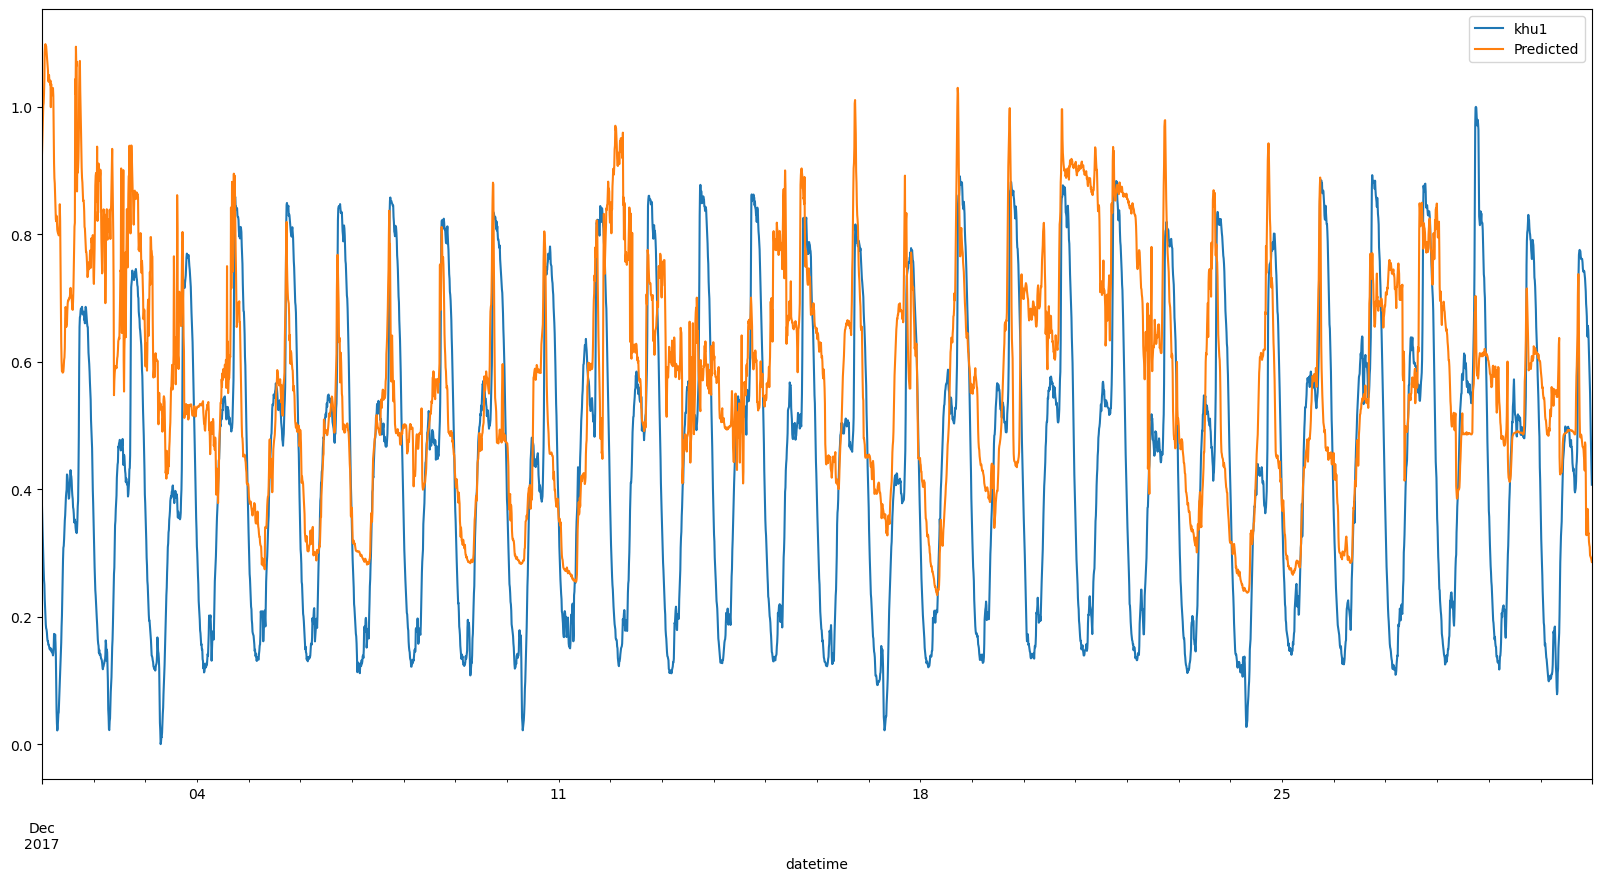

In [111]:
results_sorted.plot(figsize=(20,10))

In [112]:
X.shape

(48096, 5)

## MÔ HÌNH RNN

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
X_rnn = X.values.reshape((X.shape[0], 1, X.shape[1]))
# Define the RNN model
# Xây dựng mô hình RNN
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_rnn.shape[1], X_rnn.shape[2])),  # Input với dữ liệu đã reshape
    Dense(1)
])
# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')


# Huấn luyện mô hình
history_rnn = rnn_model.fit(X_rnn, y, epochs=100, batch_size=64)


Epoch 1/100


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - loss: 0.0669
Epoch 2/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - loss: 0.0265
Epoch 3/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - loss: 0.0263
Epoch 4/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - loss: 0.0261
Epoch 5/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - loss: 0.0260
Epoch 6/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 0.0258
Epoch 7/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - loss: 0.0260
Epoch 8/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - loss: 0.0261
Epoch 9/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 0.0256
Epoch 10/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - loss: 0.0257
Epoch 11/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - loss: 0.0257
Epoch 12/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 0.0254
Epoch 13/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - loss: 0.0252
Epoch 14/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - loss: 0.0252
Epoch 15/100
752/752 ━━━━━━

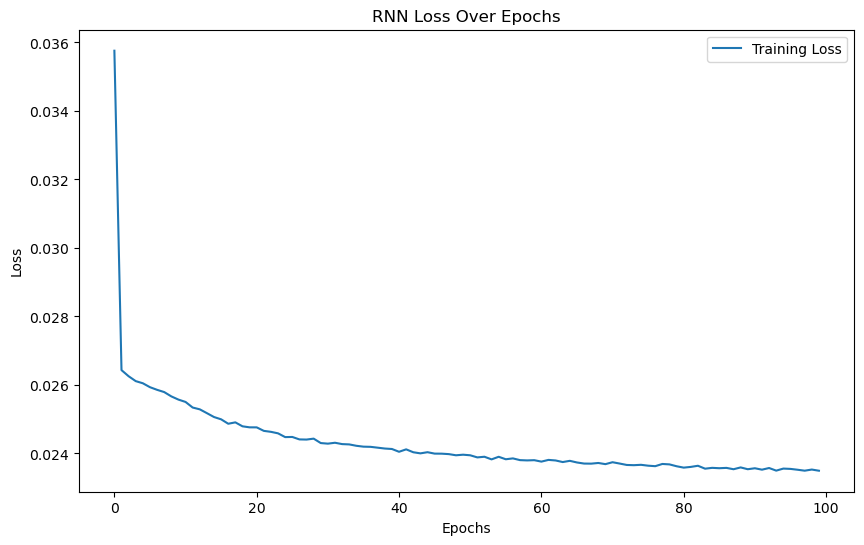

In [115]:
# Vẽ biểu đồ loss qua các epoch
loss_per_epoch_rnn = history_rnn.history['loss']
val_loss_per_epoch_rnn = history_rnn.history.get('val_loss', [])

plt.figure(figsize=(10,6))
plt.plot(range(len(loss_per_epoch_rnn)), loss_per_epoch_rnn, label='Training Loss')
if val_loss_per_epoch_rnn:
    plt.plot(range(len(val_loss_per_epoch_rnn)), val_loss_per_epoch_rnn, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RNN Loss Over Epochs')
plt.legend()
plt.show()

In [116]:
rnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,637 (53.27 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,092 (35.52 KB)

In [117]:
# Dự đoán mức tiêu thụ điện năng trên tập kiểm tra
y_pred_rnn = model_dnn.predict(Xx)

# Chuyển đổi dự đoán và giá trị thực tế thành DataFrame để dễ so sánh

resultss = pd.DataFrame({'Consumption': yy.values.flatten(), 'Predicted': y_pred_rnn.flatten()})
# Sắp xếp kết quả dự đoán theo giá trị thực tế (True)
results_sorteds = resultss.sort_index()
results_sorteds['datetime'] = data_test['DateTime'].values
results_sorteds = results_sorteds.set_index('datetime')
# Hiển thị kết quả đã sắp xếp
print(results_sorteds)

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
                     Consumption  Predicted
datetime                                   
2017-12-01 00:00:00     0.381667   0.917462
2017-12-01 00:10:00     0.356269   0.938933
2017-12-01 00:20:00     0.334796   0.966483
2017-12-01 00:30:00     0.313553   0.979207
2017-12-01 00:40:00     0.290464   1.001709
...                          ...        ...
2017-12-30 23:10:00     0.513738   0.294481
2017-12-30 23:20:00     0.486031   0.292865
2017-12-30 23:30:00     0.454168   0.291589
2017-12-30 23:40:00     0.430155   0.288269
2017-12-30 23:50:00     0.407065   0.285791

[4320 rows x 2 columns]


<Axes: xlabel='datetime'>

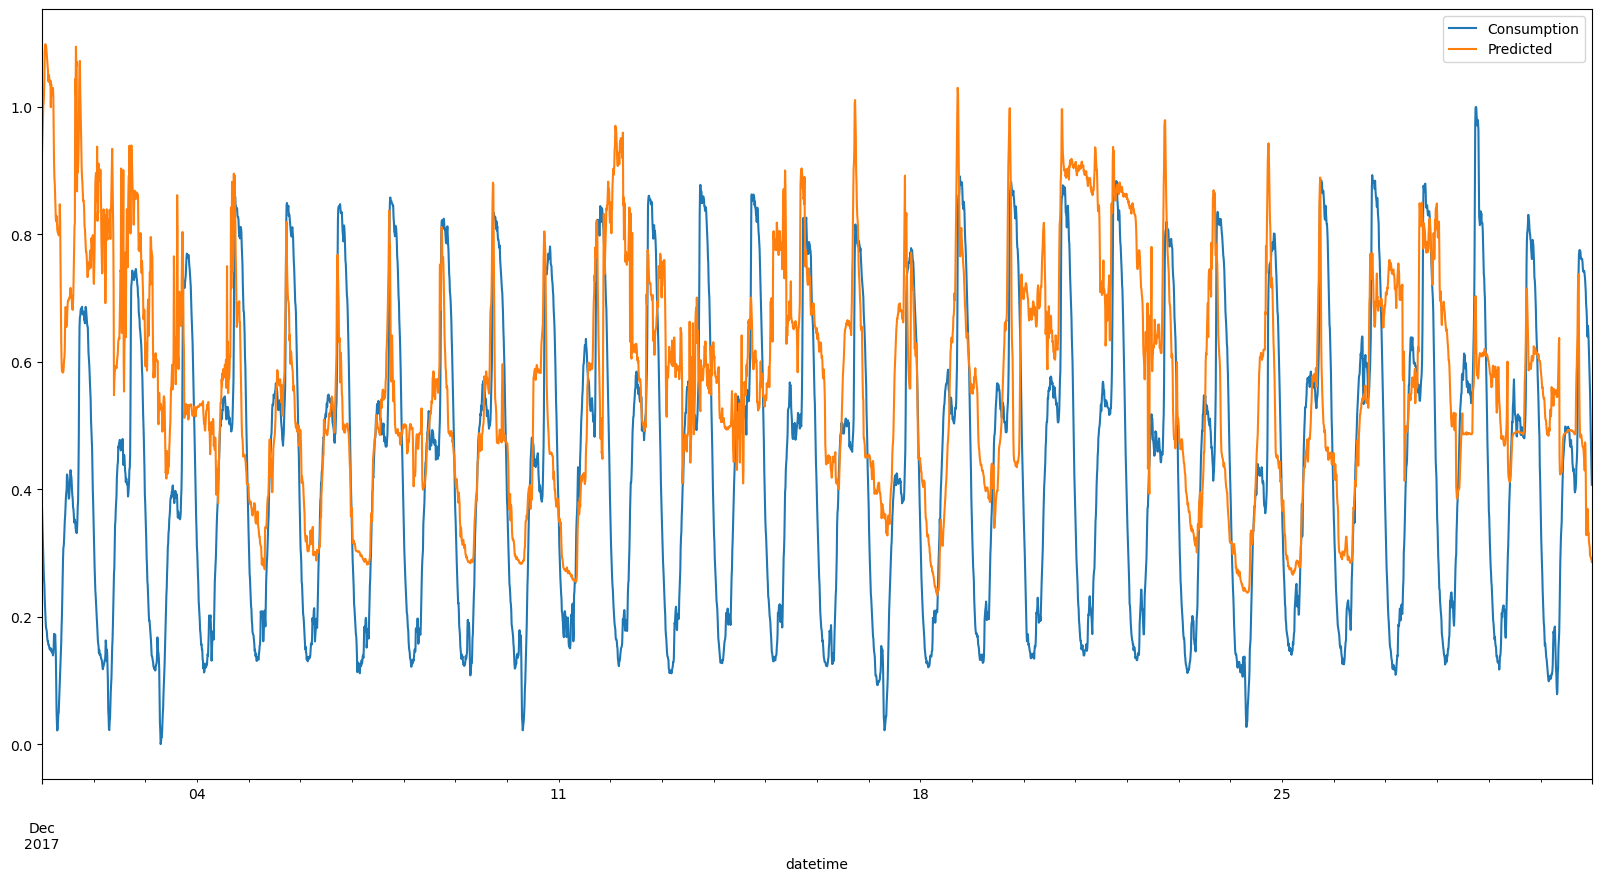

In [118]:
results_sorteds.plot(figsize=(20,10))

## MÔ HÌNH LSTM

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
X_lstm = X.values.reshape((X.shape[0], 1, X.shape[1]))
# Define the LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_lstm.shape[0], X_lstm.shape[1])),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model (reshape data for LSTM)
history_lstm = lstm_model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1503/1503 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0466
Epoch 2/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0280
Epoch 3/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0272
Epoch 4/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0268
Epoch 5/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0263
Epoch 6/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0264
Epoch 7/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0263
Epoch 8/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0257
Epoch 9/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0258
Epoch 10/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0258
Epoch 11/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0256
Epoch 12/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0254
Epoch 13/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0254
Epoch 14/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0253
Epoch 15/50
1503/1503 ━━━━━━━━━━━━━━━━━━

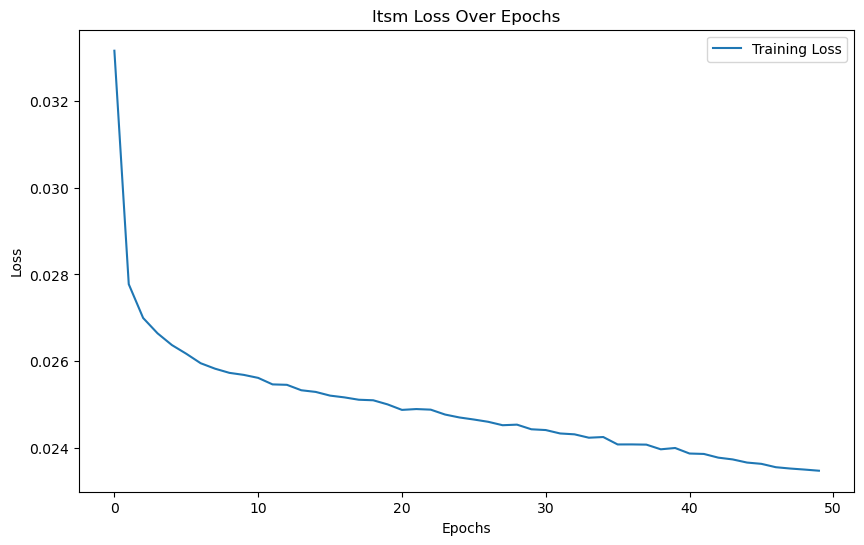

In [121]:
# Vẽ biểu đồ loss qua các epoch
loss_per_epoch_lstm = history_lstm.history['loss']
val_loss_per_epoch_lstm = history_lstm.history.get('val_loss', [])

plt.figure(figsize=(10,6))
plt.plot(range(len(loss_per_epoch_lstm)), loss_per_epoch_lstm, label='Training Loss')
if val_loss_per_epoch_lstm:
    plt.plot(range(len(val_loss_per_epoch_lstm)), val_loss_per_epoch_lstm, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ltsm Loss Over Epochs')
plt.legend()
plt.show()

In [122]:
lstm_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

In [186]:
# Dự đoán mức tiêu thụ điện năng trên tập kiểm tra
y_pred_lstm = lstm_model.predict(Xx)

resultsss = pd.DataFrame({'Consumption': yy.values.flatten(), 'Predicted': y_pred_lstm.flatten()})
# Sắp xếp kết quả dự đoán theo giá trị thực tế (True)
results_sortedsss = resultsss.sort_index()
results_sortedsss['datetime'] = data_test['DateTime'].values
results_sortedsss = results_sortedsss.set_index('datetime')
# Hiển thị kết quả đã sắp xếp
print(results_sortedsss)


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step
                     Consumption  Predicted
datetime                                   
2017-12-01 00:00:00     0.381667   0.764580
2017-12-01 00:10:00     0.356269   0.771925
2017-12-01 00:20:00     0.334796   0.786511
2017-12-01 00:30:00     0.313553   0.805541
2017-12-01 00:40:00     0.290464   0.818907
...                          ...        ...
2017-12-30 23:10:00     0.513738   0.305649
2017-12-30 23:20:00     0.486031   0.300223
2017-12-30 23:30:00     0.454168   0.296708
2017-12-30 23:40:00     0.430155   0.289402
2017-12-30 23:50:00     0.407065   0.277546

[4320 rows x 2 columns]


<Axes: xlabel='datetime'>

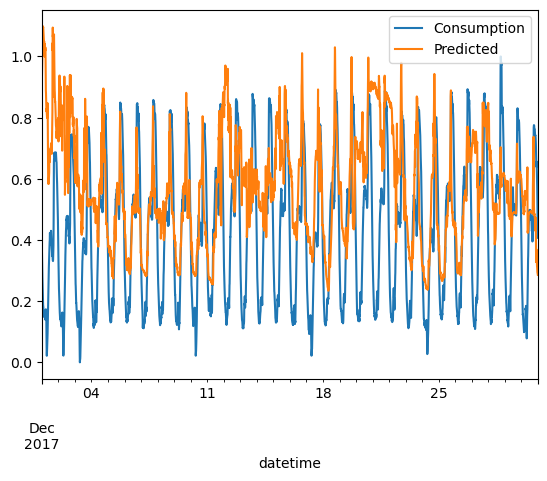

In [124]:
results_sortedsss.plot()

## MÔ HÌNH GRU

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
X_gru = X.values.reshape((X.shape[0], 1, X.shape[1]))
# Define the GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(X_gru.shape[0], X_gru.shape[1])),
    Dense(1)
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (reshape data for GRU)
history_gru = gru_model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1503/1503 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0474
Epoch 2/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0275
Epoch 3/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0264
Epoch 4/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0265
Epoch 5/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0264
Epoch 6/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0260
Epoch 7/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0262
Epoch 8/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0263
Epoch 9/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0258
Epoch 10/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0259
Epoch 11/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0256
Epoch 12/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0252
Epoch 13/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0251
Epoch 14/50
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0251
Epoch 15/50
1503/1503 ━━━━━━━━━━━━━━━━━━

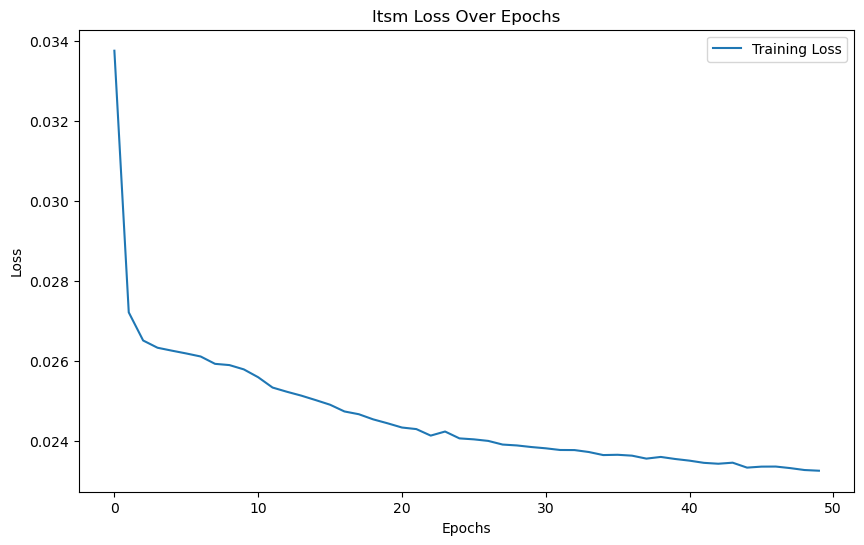

In [127]:
loss_per_epoch_gru = history_gru.history['loss']
val_loss_per_epoch_gru = history_gru.history.get('val_loss', [])

plt.figure(figsize=(10,6))
plt.plot(range(len(loss_per_epoch_gru)), loss_per_epoch_gru, label='Training Loss')
if val_loss_per_epoch_lstm:
    plt.plot(range(len(val_loss_per_epoch_gru)), val_loss_per_epoch_gru, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ltsm Loss Over Epochs')
plt.legend()
plt.show()

In [128]:
gru_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,789 (151.52 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,860 (101.02 KB)

In [129]:
y_pred_gru = gru_model.predict(Xx)

resultssss = pd.DataFrame({'Consumption': yy.values.flatten(), 'Predicted': y_pred.flatten()})
# Sắp xếp kết quả dự đoán theo giá trị thực tế (True)
results_sortedssss = resultssss.sort_index()
results_sortedssss['datetime'] = data_test['DateTime'].values
results_sortedssss = results_sortedssss.set_index('datetime')
# Hiển thị kết quả đã sắp xếp
print(results_sortedssss)

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
                     Consumption  Predicted
datetime                                   
2017-12-01 00:00:00     0.381667   0.917462
2017-12-01 00:10:00     0.356269   0.938933
2017-12-01 00:20:00     0.334796   0.966483
2017-12-01 00:30:00     0.313553   0.979207
2017-12-01 00:40:00     0.290464   1.001709
...                          ...        ...
2017-12-30 23:10:00     0.513738   0.294481
2017-12-30 23:20:00     0.486031   0.292865
2017-12-30 23:30:00     0.454168   0.291589
2017-12-30 23:40:00     0.430155   0.288269
2017-12-30 23:50:00     0.407065   0.285791

[4320 rows x 2 columns]


<Axes: xlabel='datetime'>

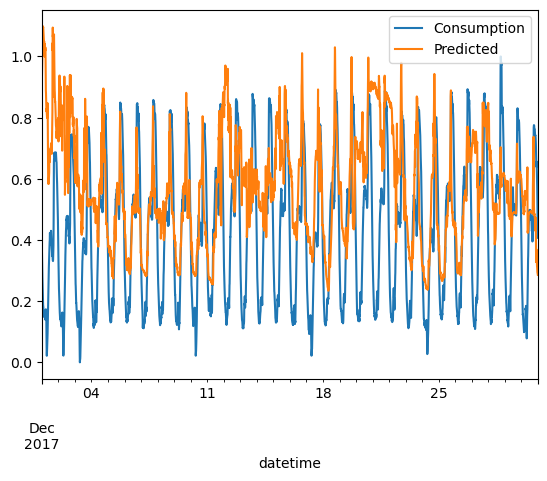

In [130]:
results_sortedssss.plot()